In [34]:
%matplotlib notebook
import os
import numpy as np
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab import imshow_grid_at_node
from landlab.components import SpatialPrecipitationDistribution
from landlab.components import OverlandFlow
import matplotlib.pyplot as plt
from landlab.plot.imshow import imshow_grid
from matplotlib.pyplot import figure

<IPython.core.display.Javascript object>


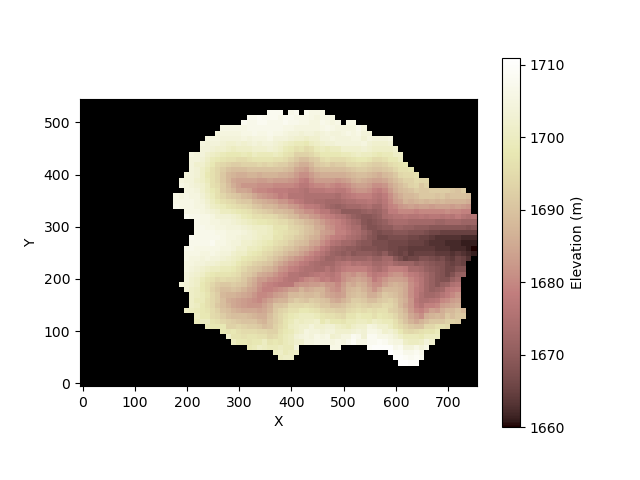

In [10]:
# here we use an arbitrary, very small, "real" catchment
# new comment
fname = "C:\\Users\\user\\Desktop\\espin-task\\fluvial\\data\\hugo_site.asc"
mg, z = read_esri_ascii(fname, name='topographic__elevation')
mg.status_at_node[mg.nodes_at_right_edge] = mg.BC_NODE_IS_FIXED_VALUE
mg.status_at_node[np.isclose(z, -9999.)] = mg.BC_NODE_IS_CLOSED

plt.figure()
imshow_grid_at_node(mg, z, colorbar_label='Elevation (m)')
plt.show()

In [19]:
run_time = 100  # duration of run, (s)
h_init = 1  # initial thin layer of water (m)
n = 0.01  # roughness coefficient, (s/m^(1/3))
g = 9.8  # gravity (m/s^2)
alpha = 0.7  # time-step factor (nondimensional; from Bates et al., 2010)
u = 0.4  # constant velocity (m/s, de Almeida et al., 2012)
run_time_slices = (10, 50, 100)

In [20]:
elapsed_time = 1.0

In [21]:
np.all(mg.at_node['topographic__elevation'] == z)

True

In [22]:
mg.add_zeros('surface_water__depth', at='node')  # water depth (m)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [23]:
mg.at_node['surface_water__depth'] += h_init

In [29]:
of = OverlandFlow(
    mg, steep_slopes=True
)  #for stability in steeper environments, we set the steep_slopes flag to True

In [30]:
while elapsed_time < run_time:
    # First, we calculate our time step.
    dt = of.calc_time_step()
    # Now, we can generate overland flow.
    of.overland_flow()
    # Increased elapsed time
    print('Elapsed time: ', elapsed_time)
    elapsed_time += dt

Elapsed time:  1.0
Elapsed time:  3.235298521
Elapsed time:  4.90139166866
Elapsed time:  6.24754489234
Elapsed time:  7.47936197828
Elapsed time:  8.70396651076
Elapsed time:  9.88685586073
Elapsed time:  10.9896411458
Elapsed time:  12.0478269167
Elapsed time:  13.0863586747
Elapsed time:  14.1087030729
Elapsed time:  15.1203887816
Elapsed time:  16.0986415054
Elapsed time:  17.0760590723
Elapsed time:  18.0438683236
Elapsed time:  19.0135545862
Elapsed time:  19.964648814
Elapsed time:  20.9021006029
Elapsed time:  21.826090938
Elapsed time:  22.7380972241
Elapsed time:  23.6441713993
Elapsed time:  24.5387623443
Elapsed time:  25.4260051398
Elapsed time:  26.3072541241
Elapsed time:  27.1797492496
Elapsed time:  28.0464294003
Elapsed time:  28.9075888564
Elapsed time:  29.7602387952
Elapsed time:  30.6057615335
Elapsed time:  31.4455579219
Elapsed time:  32.2782342394
Elapsed time:  33.1040154151
Elapsed time:  33.9247699749
Elapsed time:  34.7392949406
Elapsed time:  35.5476713345

<IPython.core.display.Javascript object>


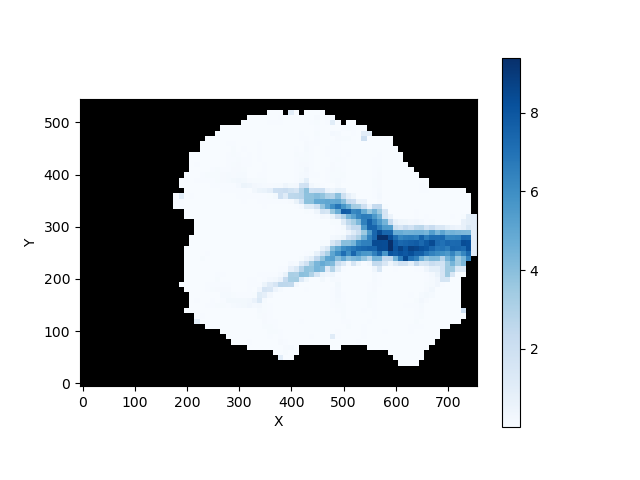

In [31]:
imshow_grid(mg, 'surface_water__depth', cmap='Blues')

<IPython.core.display.Javascript object>


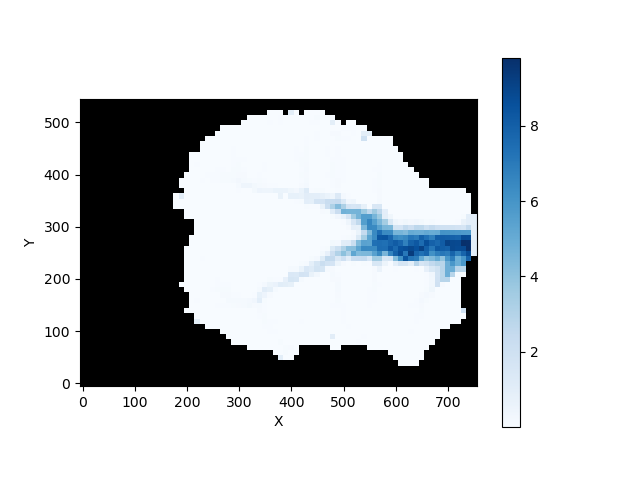

<IPython.core.display.Javascript object>


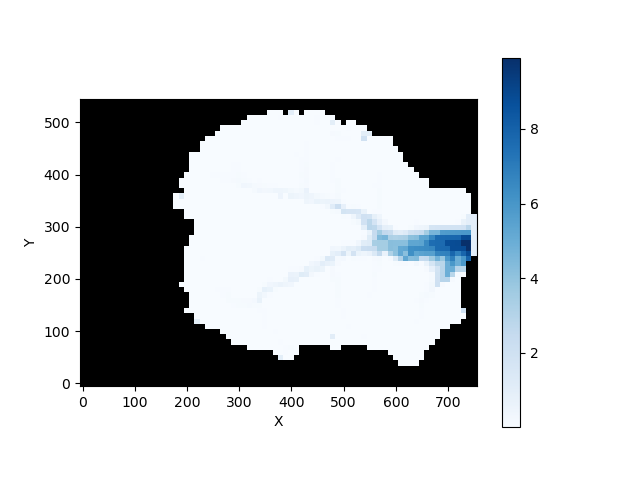

<IPython.core.display.Javascript object>


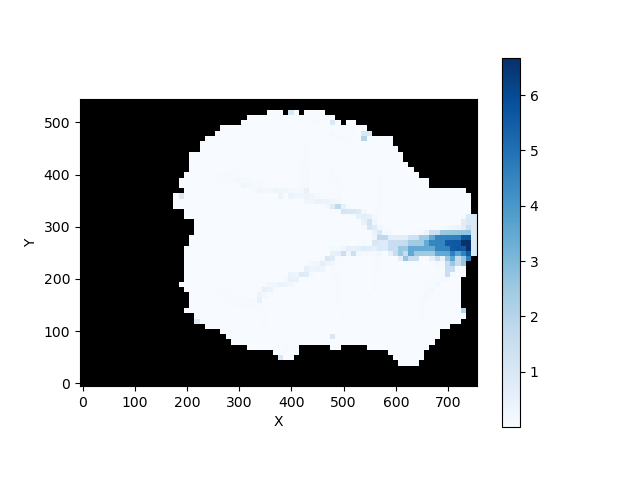

In [35]:
elapsed_time = 1.
for t in run_time_slices:
    while elapsed_time < t:
        # First, we calculate our time step.
        dt = of.calc_time_step()
        # Now, we can generate overland flow.
        of.overland_flow()
        # Increased elapsed time
        elapsed_time += dt
    figure(t)
    imshow_grid(mg, 'surface_water__depth', cmap='Blues')